### SPAM Classifier

In this Notebook, We will build predictive model that will classify which text are SPAM.

#### Context 
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

#### Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

### Introduction
Natural language processing (NLP) is about developing applications and services that are able to understand human languages. Some Practical examples of NLP are speech recognition for eg: google voice search, understanding what the content is about or sentiment analysis etc.

#### NLP Implementations
These are some of the successful implementations of Natural Language Processing (NLP):

* Search engines like Google, Yahoo, etc. Google search engine understands that you are a tech guy so it shows you results related to you.

* Social websites feed like the Facebook news feed. The news feed algorithm understands your interests using natural language processing and shows you related Ads and posts more likely than other posts.

* Speech engines like Apple Siri.

* Spam filters like Google spam filters. It’s not just about the usual spam filtering, now spam filters understand what’s inside the email content and see if it’s a spam or not.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing dataset

messages=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop unnamed columns and rename columns name

messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)
messages.columns=['label','message']
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratoory Data Analysis

Now we will check statatics view using describe() function

In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

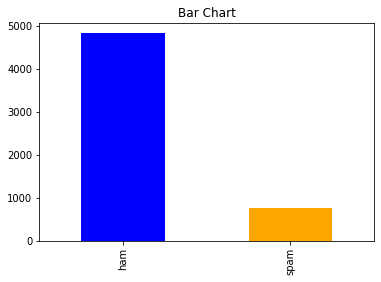

In [6]:
count= messages['label'].value_counts()
count.plot(kind='bar',color= ["blue", "orange"])
plt.title('Bar Chart')
plt.show()

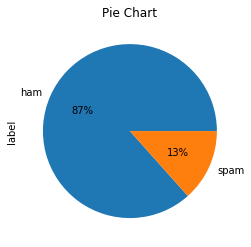

In [7]:
count.plot(kind='pie',autopct='%1.0f%%')
plt.title('Pie Chart')
plt.show()

We see that the labels are unbalanced. 0 (ham) is highly represented wheras 1 (spam) represents only 13.41% of the data.

In [8]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
from wordcloud import WordCloud

# mapping the labels as 0 or 1
# 0 for ham and 1 for spam
messages1=messages.copy()
messages1['label'] = messages1['label'].map({'ham': 0, 'spam': 1})
messages1.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Word cloud for SPAM 

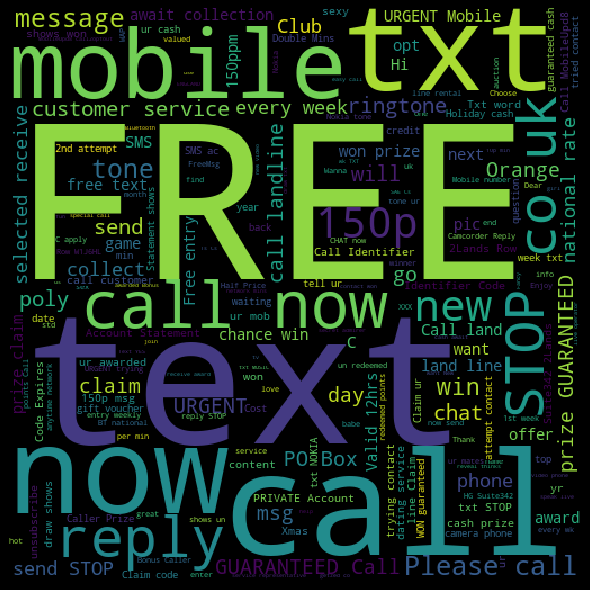

In [10]:
spam_words = ' '.join(list(messages1[messages1['label']== 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [11]:
### Word cloud for HAM

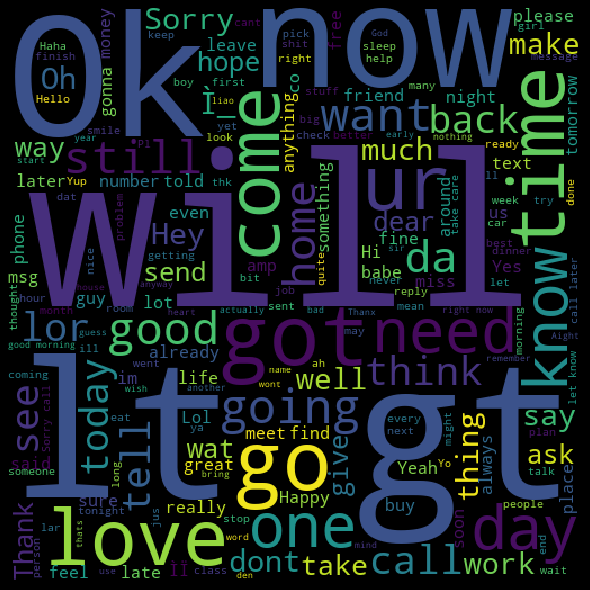

In [12]:
ham_words = ' '.join(list(messages1[messages1['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Text Preprocessing

In order to apply a model, the necessary preprocessing must be completed. For text classification, usual preprocessing includes removing stop words (words that don't provide useful meaning, i.e. "and" "or"). Also the characters are converted to a single case (the below function converts to lower case). The function below then stems each word (this means that it replaces a word with the root of that word, for example "tasted" or "tasting" would become "taste").

In [13]:
ps=PorterStemmer()

corpus=[]

for i in range(0,len(messages)):
    # using re remove character, numbers
    review=re.sub('[^a-zA-Z]',' ', messages['message'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)
    corpus.append(review) 

In [14]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### Bag of Words

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

In [16]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X=cv.fit_transform(corpus).toarray()

Here, we have label in categorical type hence we will convert them into 0 and 1 value using get_dummies() function.
HAM will become 0 and SPAM will become 1.

In [17]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

### Model

we'll split the data into train data and test data in order to have an accurate estimation of the final classifier's performance.

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### MultinomialNB model

Naive Bayes is commonly applied to text classification. Naive Bayes classifiers work by correlating the use of tokens with spam and non-spam e-mails and then using Bayes' theorem to calculate a probability that an email is or is not spam.

The “Naive” assumption that the Naive Bayes classifier makes is that the probability of observing a word is independent of each other. The result is that the “likelihood” is the product of the individual probabilities of seeing each word in the set of Spam or Ham emails.

In [19]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

score=accuracy_score(y_test,y_pred)
print('Accuracy :', score)

Accuracy : 0.979372197309417


In [22]:
print(classification_report(y_test, y_pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.90      0.96      0.93       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[932  17]
 [  6 160]]


### SVM

In [23]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)

score1=accuracy_score(y_test,y_pred1)
print('Accuracy :', score1)

Accuracy : 0.9031390134529148


In [56]:
print(classification_report(y_test, y_pred1))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       949
           1       0.71      0.58      0.64       166

    accuracy                           0.90      1115
   macro avg       0.82      0.77      0.79      1115
weighted avg       0.90      0.90      0.90      1115


Confusion Matrix:
 [[910  39]
 [ 69  97]]


In [41]:
y_test[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

In [40]:
y_pred[:50]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

In [42]:
y_pred1[:50]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

Here, we have accuracy result of both algorithm but we get better accuacy in Navie bayes algorithm than SVM.
There are many other models that may be more suitable for this dataset, however both of these model produce sufficient results.

After calculation we find that Naive Bayes' Classification has more accuracy support. The error rate is very low when we are using the Naive Bayes Classification. Thus, using naive bayes algorithm we can classify ham and spam messages with the accuracy of 97%.